# ANÁLISIS EXPLORATORIO DE DATOS - ATAQUES DE CIBERSEGURIDAD

- Dataset: Ataques de ciberseguridad
- Registros: 40,000
- Columnas: 25

**Fuente:** [Kaggle - Cyber Security Attacks Dataset](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/code)

## Objetivos de la Investigación
Analisar Cuáles son los patrones de comportamiento y características más relevantes de los ataques de ciberseguridad que permiten identificar amenazas y mejorar los sistemas de detección

### Metodología:
- Análisis exploratorio de datos (EDA)
- Visualización de patrones y tendencias
- Análisis estadístico descriptivo
- Identificación de correlaciones entre variables

## Configuración Inicial

In [76]:
# Importar libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset
df = pd.read_csv("cybersecurity_attacks.csv")
print(f"Dataset cargado exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas\n")

Dataset cargado exitosamente: 40000 filas, 25 columnas



In [78]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

## Estadisticas descriptivas

In [ ]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


## 3. Limpieza de Datos

### 3.1 Información general del dataset

In [94]:
print("Información general del dataset:")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Tipos de datos:\n{df.dtypes.value_counts()}")
print(f"\nDimensiones: {df.shape}")
df.info()

Información general del dataset:
Memoria utilizada: 60.68 MB
Tipos de datos:
object            20
int64              3
datetime64[ns]     1
float64            1
Name: count, dtype: int64

Dimensiones: (40000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data 

### 3.2 Análisis de valores faltantes

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame(
    {
        "Columna": missing_data.index,
        "Valores_Faltantes": missing_data.values,
        "Porcentaje": missing_percent.values,
    }
).sort_values("Porcentaje", ascending=False)

print("Columnas con valores faltantes:")
# print(missing_df[missing_df['Valores_Faltantes'] > 0])
missing_data

Columnas con valores faltantes:


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

### 3.3 Análisis de duplicados

In [101]:
print(f"Registros duplicados: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Eliminando duplicados...")
    df = df.drop_duplicates()
    print(f"Dataset después de eliminar duplicados: {df.shape}")

Registros duplicados: 0


### 3.4 Columnas no relevantes

In [129]:
# Eliminar columnas no relevantes
if "Malware Indicators" in df.columns:
    df = df.drop("Malware Indicators", axis=1)
    print(f"Columna 'Malware Indicators' eliminada. Nuevas dimensiones: {df.shape}")

Columna 'Malware Indicators' eliminada. Nuevas dimensiones: (40000, 32)


## 4 Transformaciones

In [110]:
# Convertir Timestamp a datetime
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    print(
        f"Timestamp convertido a datetime. Valores inválidos: {df['Timestamp'].isnull().sum()}"
    )

Timestamp convertido a datetime. Valores inválidos: 0


In [ ]:
# Limpiar columnas numéricas
numeric_columns = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores"]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        print(f"{col}: {df[col].isnull().sum()} valores convertidos a NaN")

Source Port: 0 valores convertidos a NaN
Destination Port: 0 valores convertidos a NaN
Packet Length: 0 valores convertidos a NaN
Anomaly Scores: 0 valores convertidos a NaN


In [105]:
# Imputación de valores faltantes
print("Tratamiento de valores faltantes:")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["int64", "float64"]:
            # Para variables numéricas, usar mediana
            df[col].fillna(df[col].median(), inplace=True)
            print(f"{col}: Imputado con mediana")
        else:
            # Para variables categóricas, usar moda o 'Unknown'
            if df[col].mode().empty:
                df[col].fillna("Unknown", inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"{col}: Imputado con moda o 'Unknown'")

print(f"\nDataset limpio final: {df.shape}")

Tratamiento de valores faltantes:

Dataset limpio final: (40000, 25)


In [ ]:
# Crear variables derivadas de Timestamp
if "Timestamp" in df.columns and not df["Timestamp"].isnull().all():
    df["Year"] = df["Timestamp"].dt.year
    df["Month"] = df["Timestamp"].dt.month
    df["Day"] = df["Timestamp"].dt.day
    df["Hour"] = df["Timestamp"].dt.hour
    df["DayOfWeek"] = df["Timestamp"].dt.dayofweek  # 0=Lunes, 6=Domingo
    print("Variables temporales creadas: Year, Month, Day, Hour, DayOfWeek")

Variables temporales creadas: Year, Month, Day, Hour, DayOfWeek


In [111]:
# Crear variable numérica a partir de Action Taken
if "Action Taken" in df.columns:
    # Mapear las acciones a valores numéricos según su nivel de severidad
    action_mapping = {
        "Ignored": 0,
        "Logged": 1,
        "Blocked": 2,
        "Quarantined": 3,
        "Terminated": 4,
    }
    df["Action Taken Numeric"] = df["Action Taken"].map(action_mapping)

    # Para valores no mapeados, asignar un valor por defecto
    df["Action Taken Numeric"].fillna(0, inplace=True)

    print("Variable numérica creada: Action Taken Numeric")
    print(f"Distribución de Action Taken Numeric:")
    print(df["Action Taken Numeric"].value_counts().sort_index())

Variable numérica creada: Action Taken Numeric
Distribución de Action Taken Numeric:
Action Taken Numeric
0    13276
1    13195
2    13529
Name: count, dtype: int64


/var/folders/s7/gs4k992s6_v4lcg1dgy22fk40000gn/T/ipykernel_41389/1132307630.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Action Taken Numeric"].fillna(0, inplace=True)


In [112]:
# Crear variable categórica para el tamaño del paquete
if "Packet Length" in df.columns:
    df["Packet_Size_Category"] = pd.cut(
        df["Packet Length"],
        bins=[0, 500, 1000, 1500, float("inf")],
        labels=["Small", "Medium", "Large", "XLarge"],
    )
    print("Categoría de tamaño de paquete creada: Packet_Size_Category")

print(f"Dataset con nuevas variables: {df.shape}")

Categoría de tamaño de paquete creada: Packet_Size_Category
Dataset con nuevas variables: (40000, 32)


In [124]:
if "Anomaly Scores" in df.columns:
    df["Anomaly_Category"] = pd.cut(
        df["Anomaly Scores"],
        bins=[0, 25, 50, 75, 100],
        labels=["Bajo", "Medio", "Alto", "Crítico"],
    )
    
    
print(df["Anomaly_Category"])
print("✓ Categorización de Anomaly Scores completada")

0          Medio
1           Alto
2        Crítico
3           Bajo
4           Bajo
          ...   
39995      Medio
39996      Medio
39997      Medio
39998    Crítico
39999      Medio
Name: Anomaly_Category, Length: 40000, dtype: category
Categories (4, object): ['Bajo' < 'Medio' < 'Alto' < 'Crítico']
✓ Categorización de Anomaly Scores completada


### Resumen de Limpieza

In [125]:
print(f"Filas finales: {df.shape[0]}")
print(f"Columnas finales: {df.shape[1]}")
print("Columnas agregadas:")
print(df.columns.tolist()[25:])


Filas finales: 40000
Columnas finales: 33
Columnas agregadas:
['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Action Taken Numeric', 'Packet_Size_Category', 'Anomaly_Category']


## 5. Análisis exploratorio inicial

### Estadísticas descriptivas

In [ ]:
# Estadisticas descriptivas
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_vars:
    print("Estadísticas descriptivas para variables numéricas:")
    desc_stats = df[numeric_vars].describe()
    print(desc_stats.round(2))


Estadísticas descriptivas:
Estadísticas descriptivas para variables numéricas:
       Source Port  Destination Port  Packet Length  Anomaly Scores      Year  \
count     40000.00          40000.00       40000.00        40000.00  40000.00   
mean      32970.36          33150.87         781.45           50.11   2021.41   
std       18560.43          18574.67         416.04           28.85      1.09   
min        1027.00           1024.00          64.00            0.00   2020.00   
25%       16850.75          17094.75         420.00           25.15   2020.00   
50%       32856.00          33004.50         782.00           50.34   2021.00   
75%       48928.25          49287.00        1143.00           75.03   2022.00   
max       65530.00          65535.00        1500.00          100.00   2023.00   

          Month       Day      Hour  DayOfWeek  
count  40000.00  40000.00  40000.00    40000.0  
mean       6.29     15.63     11.51        3.0  
std        3.33      8.77      6.92        

### Variables categoricas

In [140]:
# Variables categoricas
categorical_vars = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Excluir direcciones IP que tienen demasiadas categorías únicas
columns_to_exclude = [
    "Source IP Address",
    "Destination IP Address",
    "Payload Data",
    "Alert Triggered",
    "User Information",
    "Device Information",
    "Geo-location Data",
    "Proxy Information",
    "Firewall Logs",
    "IDS/IPS Alerts"
]
categorical_vars = [col for col in categorical_vars if col not in columns_to_exclude]
if categorical_vars:
    print(f"\n\nVariables categóricas encontradas: {len(categorical_vars)}")
    for col in categorical_vars[:10]:  # Mostrar solo las primeras 10
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        print(value_counts)



Variables categóricas encontradas: 12

Protocol:
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

Packet Type:
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

Traffic Type:
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

Alerts/Warnings:
Alerts/Warnings
Alert Triggered    40000
Name: count, dtype: int64

Attack Type:
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

Attack Signature:
Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64

Action Taken:
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

Severity Level:
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

Network Segment:
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

Log Source:
Log Source
Firewall    20116
Server      19

### Variables Categóricas Seleccionadas para el Análisis

#### Para nuestro análisis de ciberseguridad, hemos seleccionado las siguientes variables categóricas relevantes:

**Variables de Red y Protocolo:**
- **Protocol**: Protocolo de comunicación utilizado (TCP, UDP, ICMP, etc.)
- **Packet Type**: Tipo de paquete de red
- **Traffic Type**: Clasificación del tipo de tráfico

**Variables de Seguridad:**
- **Alerts/Warnings**: Alertas y advertencias generadas
- **Attack Type**: Tipo de ataque detectado
- **Attack Signature**: Firma o patrón del ataque

**Variables de Respuesta:**
 - **Action Taken**: Acción tomada en respuesta al evento
 - **Severity Level**: Nivel de severidad del evento
  
**Variables de Infraestructura:**
- **Network Segment**: Segmento de red donde ocurrió el evento
- **Log Source**: Fuente que generó el registro (Firewall, IDS/IPS, etc.)

Estas variables nos permitirán realizar un análisis completo de los patrones de seguridad y comportamiento de la red.

In [141]:
categorical_vars = [
    "Protocol",
    "Packet Type",
    "Traffic Type",
    "Alerts/Warnings",
    "Attack Type",
    "Attack Signature",
    "Action Taken",
    "Severity Level",
    "Network Segment",
    "Log Source",
]

### Variables Númericas

In [147]:
# Identificar variables numéricas del dataset
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
print("numeric_columns", numeric_columns)

numeric_columns Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
       'Action Taken Numeric'],
      dtype='object')


### Análisis Univariado

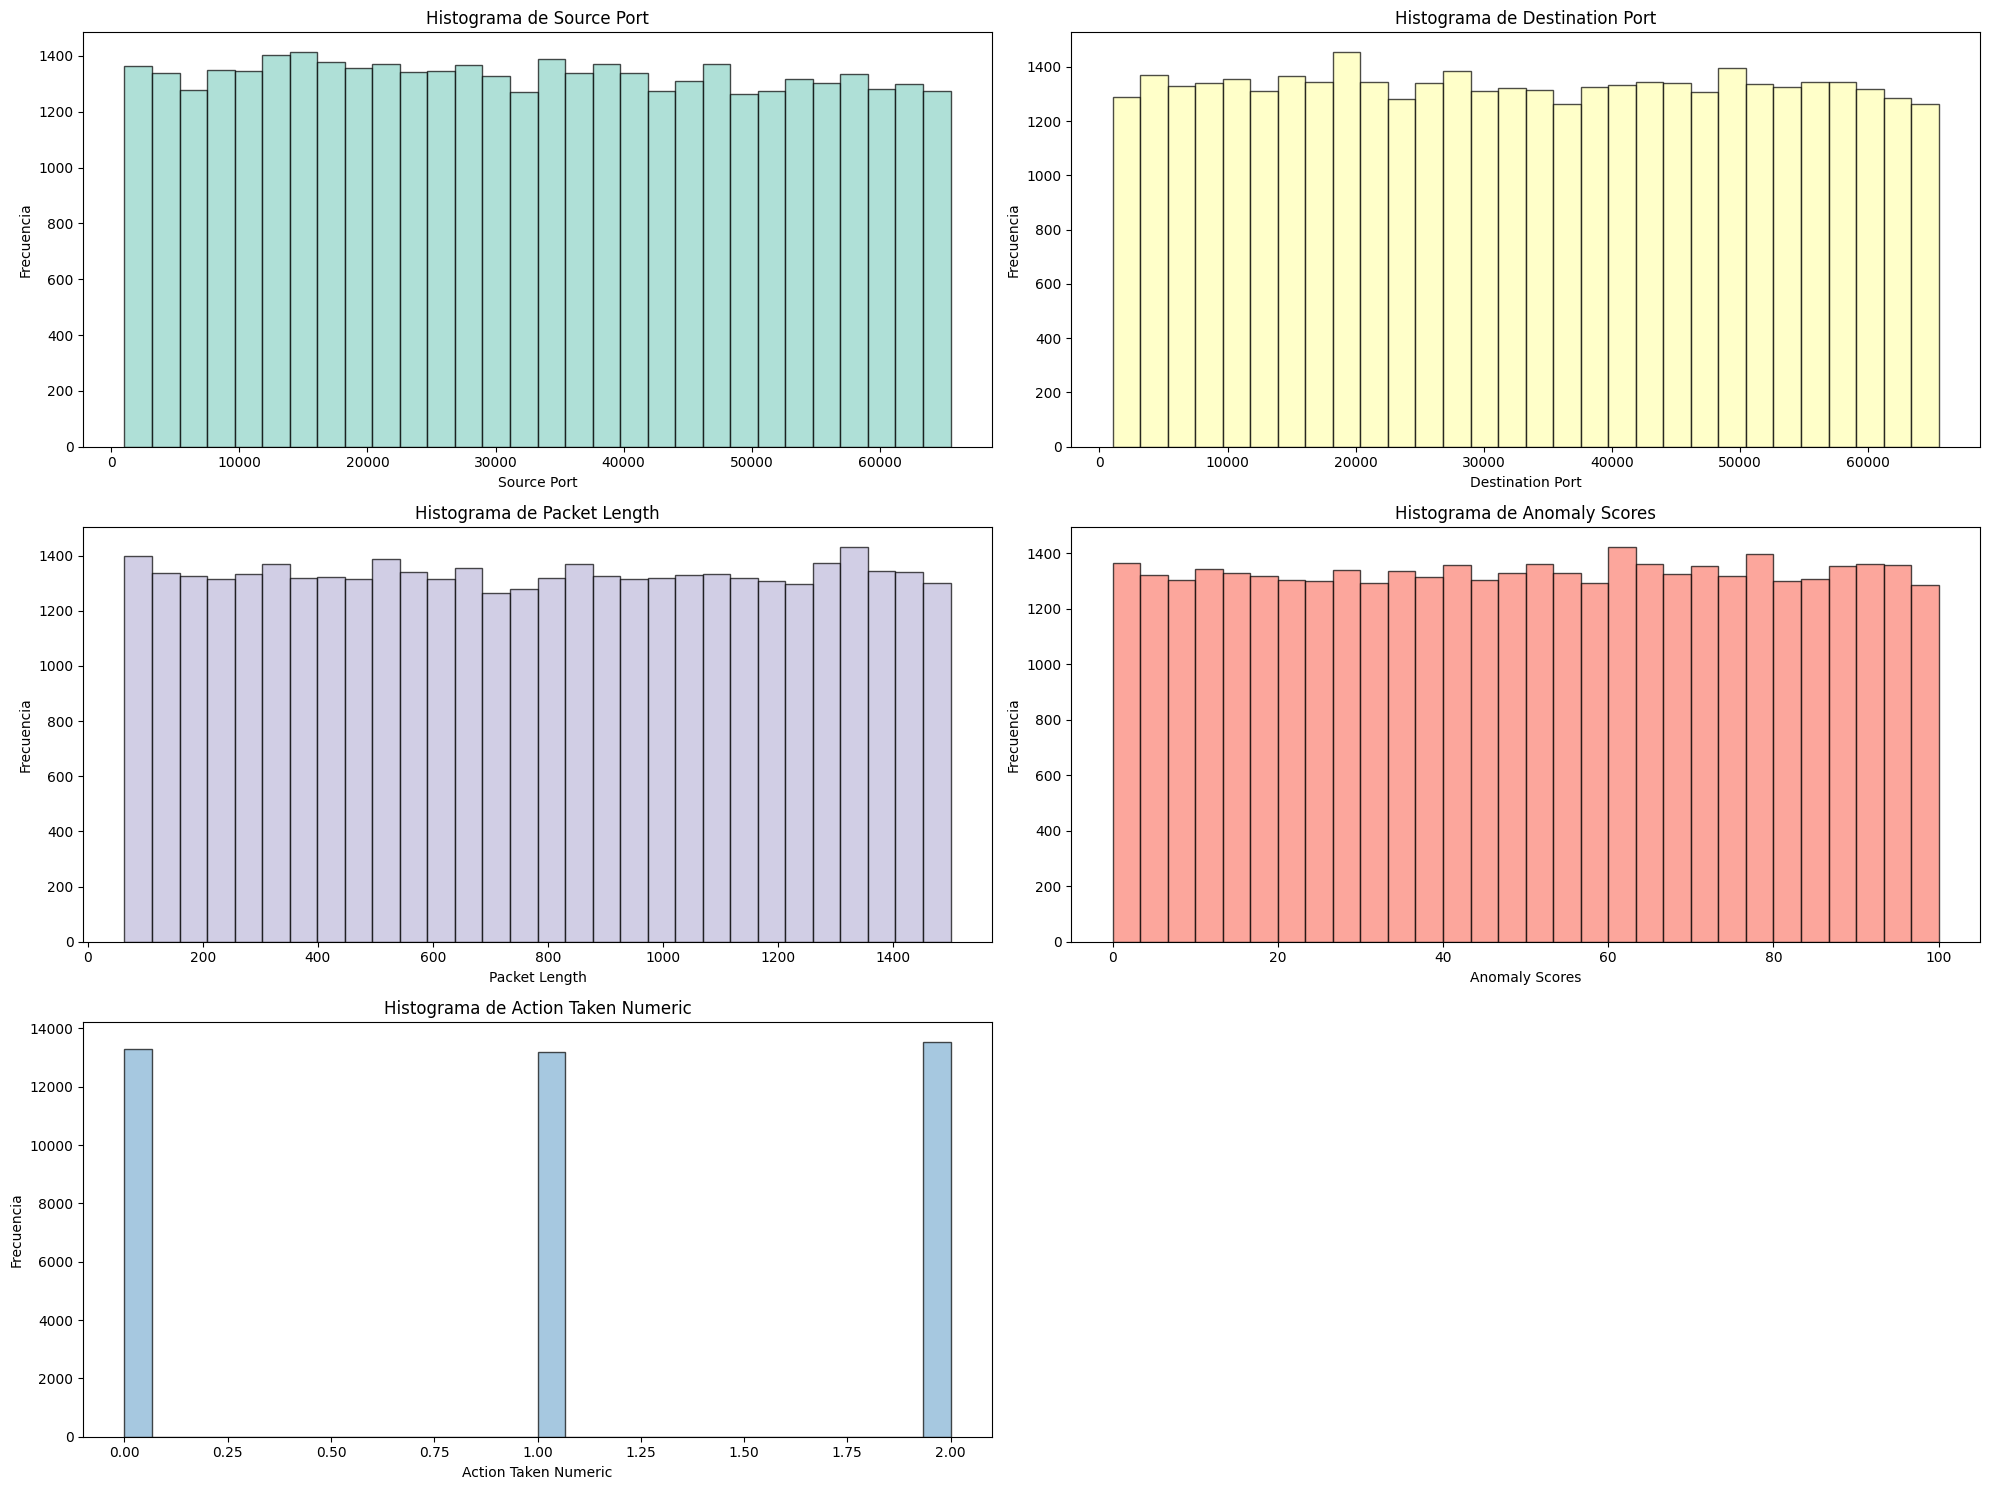

In [153]:
# Crear visualizaciones
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor="black", color=plt.cm.Set3(i))
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Ocultar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Analisis de Frecuencia en variables categoricas

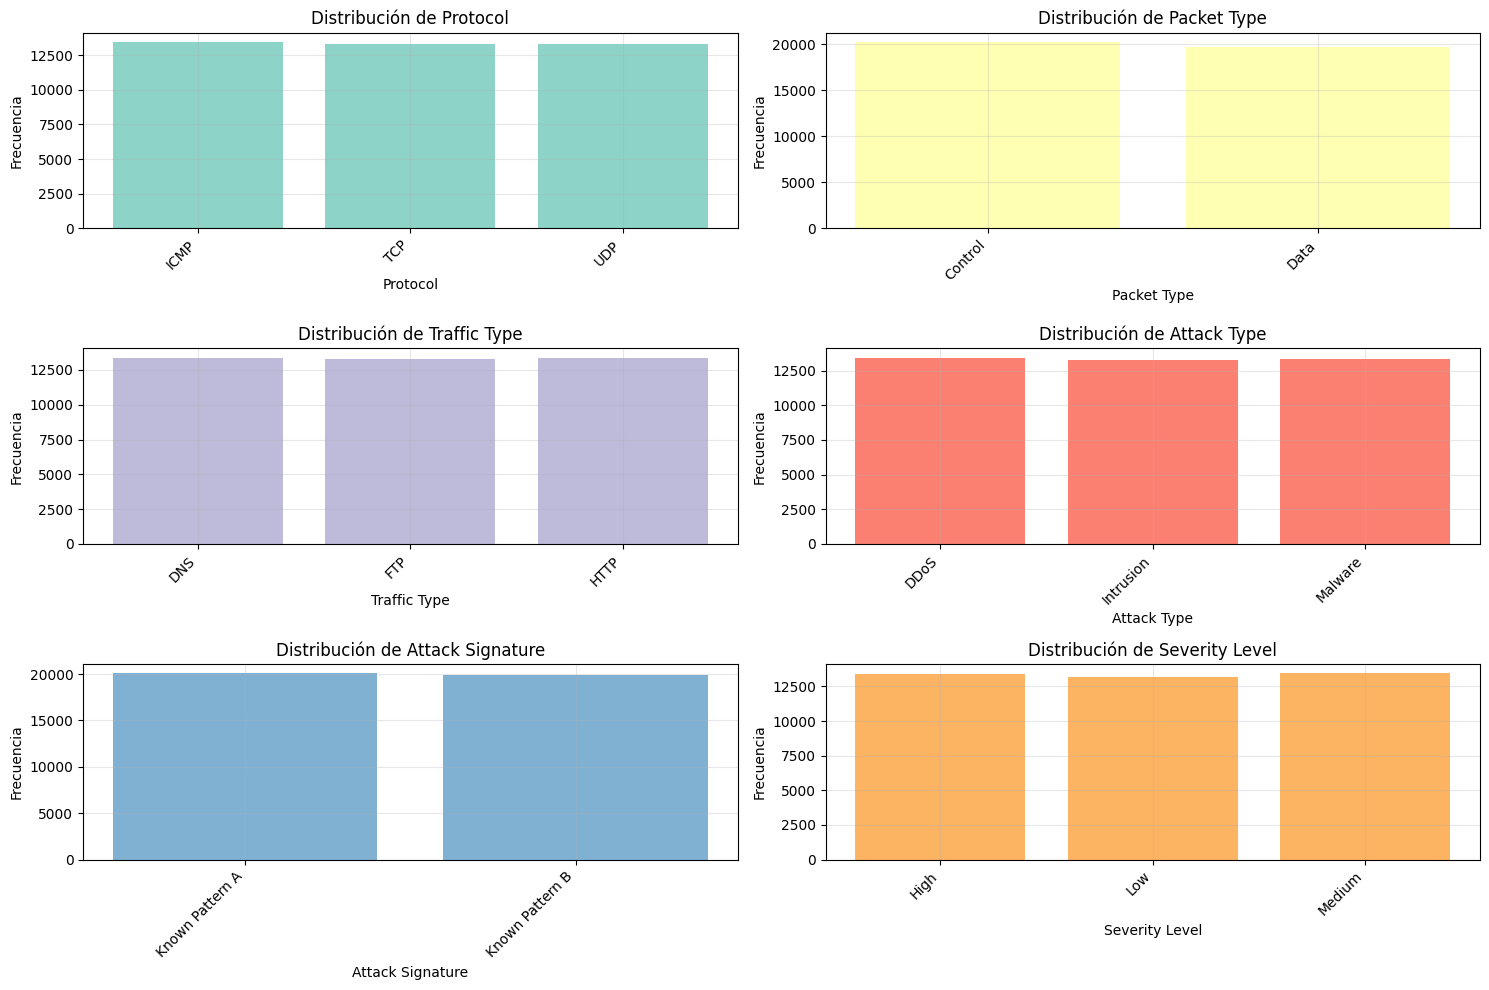

In [166]:
key_categorical = [
    "Protocol",
    "Packet Type",
    "Traffic Type",
    "Attack Type",
    "Attack Signature",
    "Severity Level",
]
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()


for col in key_categorical:
    # print(col)
    for i, col in enumerate(key_categorical):
        axes[i].bar(
            df.groupby(df[col].dropna()).size().index,
            df.groupby(df[col].dropna()).size().values,
            color=plt.cm.Set3(i)
        )
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_xticks(range(len(df.groupby(df[col]).size().index)))
        axes[i].set_xticklabels(
            df.groupby(df[col]).size().index, rotation=45, ha="right"
        )
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

numeric_columns Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
       'Action Taken Numeric'],
      dtype='object')


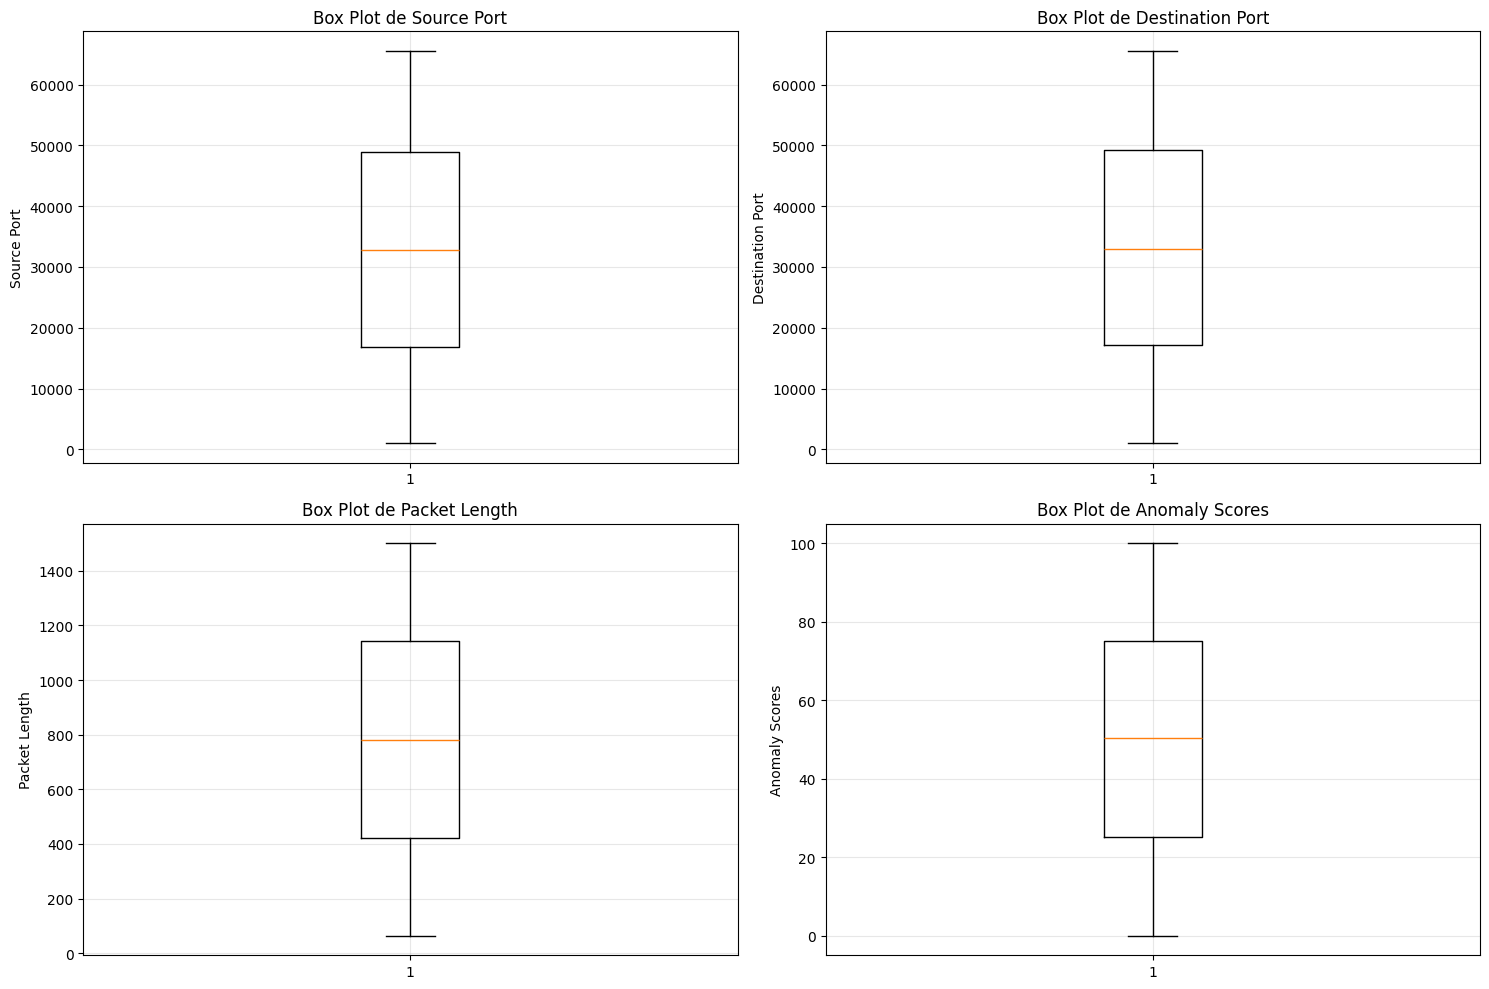

In [170]:
# Box plots para detectar outliers
print("numeric_columns", numeric_columns)
if len(numeric_columns) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_columns):
        if i < 4:
            axes[i].boxplot(df[col].dropna())
            axes[i].set_title(f"Box Plot de {col}")
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### ANÁLISIS BIVARIADO

                  Source Port  Destination Port  Packet Length  Anomaly Scores
Source Port          1.000000         -0.005216       0.003657        0.004826
Destination Port    -0.005216          1.000000       0.002581       -0.003616
Packet Length        0.003657          0.002581       1.000000       -0.003599
Anomaly Scores       0.004826         -0.003616      -0.003599        1.000000


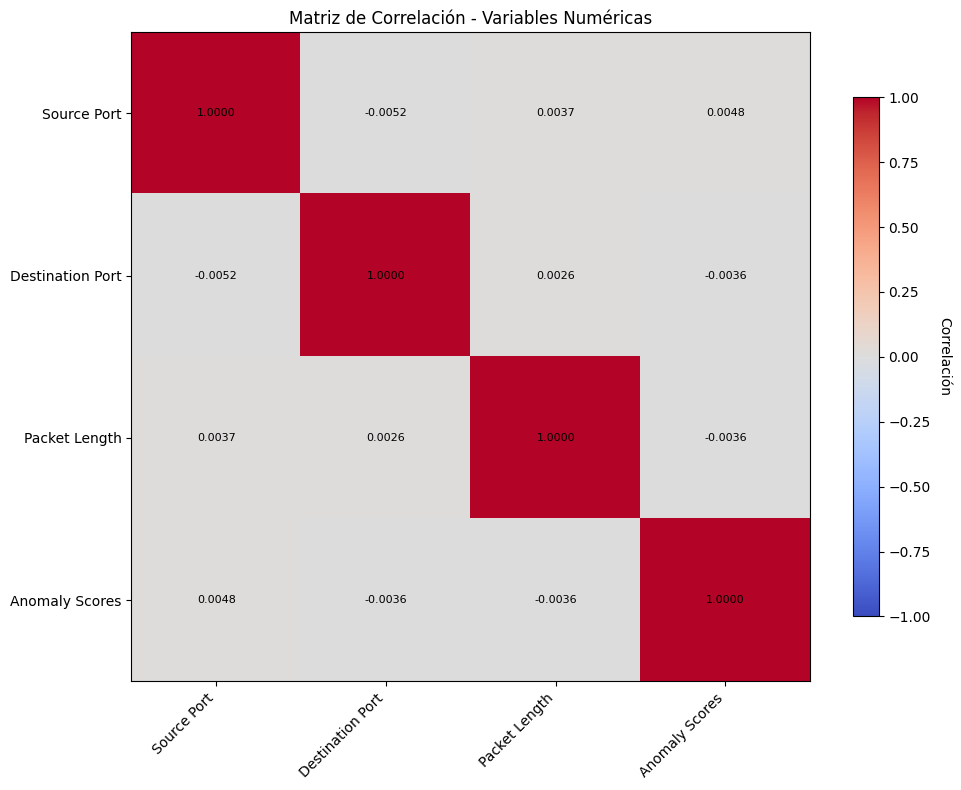

In [176]:
# Filtrar las columnas numéricas excluyendo "Action Taken Numeric"
numeric_columns_filtered = [col for col in numeric_columns if col != "Action Taken Numeric"]
correlation_matrix = df[numeric_columns_filtered].corr()
print(correlation_matrix)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el mapa de calor usando imshow
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Configurar las etiquetas de los ejes
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Añadir los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.4f}',
                      ha='center', va='center', color='black', fontsize=8)

# Añadir barra de colores
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Correlación', rotation=270, labelpad=15)

plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

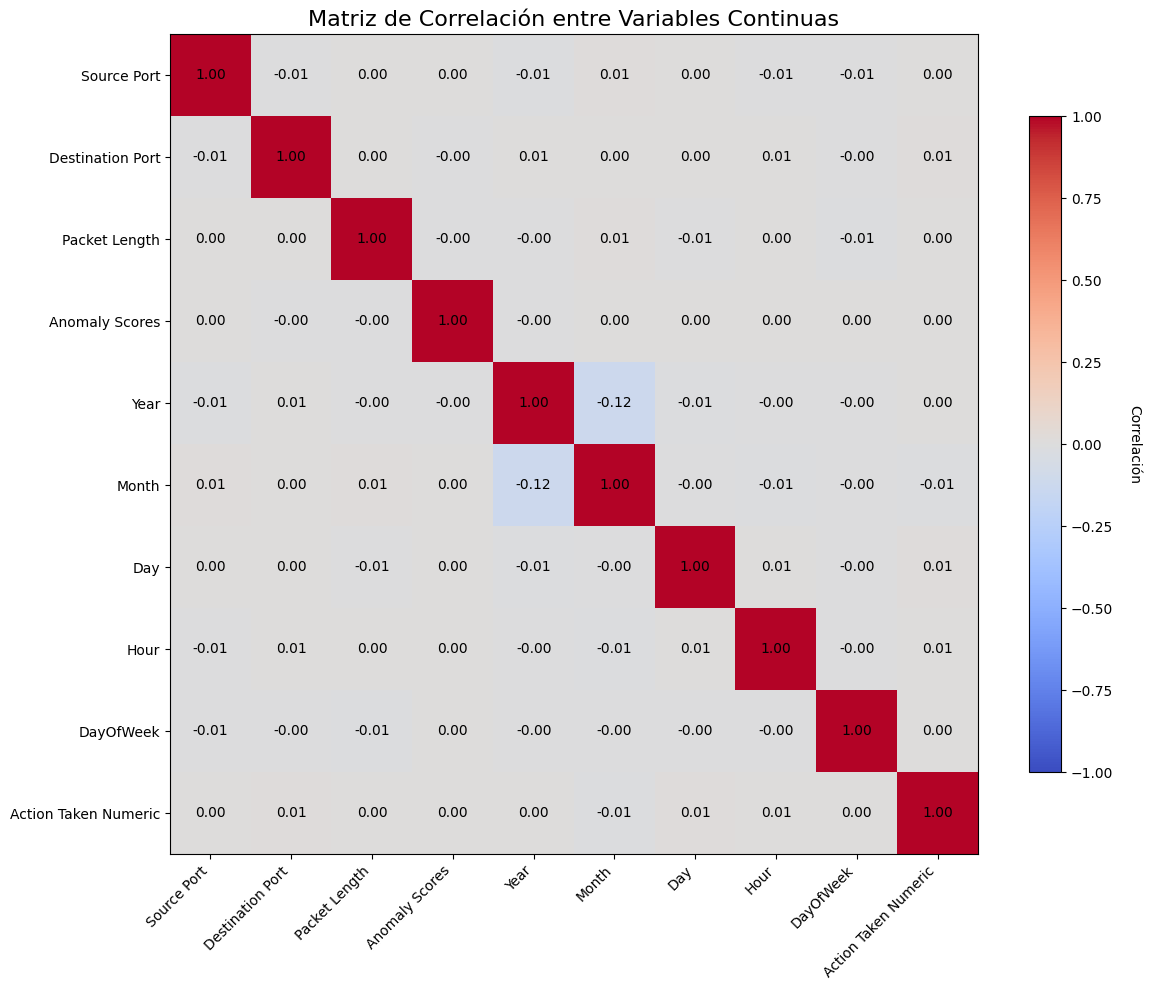


=== Correlaciones con Action Taken ===
Action Taken Numeric    1.000000
Month                  -0.010766
Destination Port        0.010459
Day                     0.009574
Hour                    0.006037
Source Port             0.003962
Year                    0.003572
Anomaly Scores          0.003033
Packet Length           0.002441
DayOfWeek               0.002012
Name: Action Taken Numeric, dtype: float64


In [73]:
numeric_data = df.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear heatmap de correlaciones usando matplotlib
fig, ax = plt.subplots(figsize=(12, 10))

# Crear el mapa de calor
im = ax.imshow(correlation_matrix, cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)

# Añadir valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(
            j,
            i,
            f"{correlation_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

# Añadir barra de colores
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label("Correlación", rotation=270, labelpad=20)

plt.title("Matriz de Correlación entre Variables Continuas", fontsize=16)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más fuertes con exam_score
print("\n=== Correlaciones con Action Taken ===")
action_taken_correlations = correlation_matrix["Action Taken Numeric"].sort_values(
    key=abs, ascending=False
)
print(action_taken_correlations)

## ANÁLISIS Y CONCLUSIONES

In [ ]:
print("ANÁLISIS Y CONCLUSIONES")

print("VARIABLES MÁS DETERMINANTES EN CIBERATAQUES:")

# Análisis de importancia de variables
print("\nBasado en el análisis exploratorio:")

# Correlaciones más fuertes con anomaly scores
if "Anomaly Scores" in df.columns and len(available_numeric) > 1:
    corr_with_anomaly = (
        correlation_matrix["Anomaly Scores"].abs().sort_values(ascending=False)
    )
    print(f"\nVariables más correlacionadas con Anomaly Scores:")
    for var, corr in corr_with_anomaly.items():
        if var != "Anomaly Scores" and not np.isnan(corr):
            print(f"  - {var}: {corr:.3f}")

# Análisis de frecuencias de ataques
if "Attack Type" in df.columns:
    print(f"\nTipos de ataques más frecuentes:")
    attack_freq = df["Attack Type"].value_counts()
    for attack, freq in attack_freq.head().items():
        print(f"  - {attack}: {freq} ({freq/len(df)*100:.1f}%)")

# Análisis de protocolos más atacados
if "Protocol" in df.columns:
    print(f"\nProtocolos más utilizados en ataques:")
    protocol_attacks = df[df["Attack Type"].notna()]["Protocol"].value_counts()
    for protocol, freq in protocol_attacks.head().items():
        print(f"  - {protocol}: {freq} ataques")

ANÁLISIS Y CONCLUSIONES
VARIABLES MÁS DETERMINANTES EN CIBERATAQUES:

Basado en el análisis exploratorio:

Variables más correlacionadas con Anomaly Scores:
  - Source Port: 0.005
  - Destination Port: 0.004
  - Packet Length: 0.004

Tipos de ataques más frecuentes:
  - DDoS: 13428 (33.6%)
  - Malware: 13307 (33.3%)
  - Intrusion: 13265 (33.2%)

Protocolos más utilizados en ataques:
  - ICMP: 13429 ataques
  - UDP: 13299 ataques
  - TCP: 13272 ataques
